🛍️ **Welcome to My Supermarket Purchase Analysis Portfolio!** 🛒  

Have you ever wondered what trends lie behind supermarket purchases? From customer preferences to sales patterns, this project dives deep into understanding the dynamics of supermarket transactions using a dataset sourced from Kaggle. This dataset, stored in a CSV file, captures critical details like branch performance, product ratings, payment methods, and more—everything needed to uncover actionable insights.  

To kick things off, I conducted **data wrangling** 🛠️, ensuring the dataset was clean and reliable by addressing missing values, verifying formats, outliers, mispellings, and removing duplicates. With the data prepped, I delved into **Exploratory Data Analysis (EDA)** 🔍, uncovering fascinating trends and relationships that illuminate supermarket performance and customer behavior.  

Through this analysis, I sought to answer key business questions, including:  

1. 🏬 **Branch Performance:**  
   - Which branch generates the highest gross income?  
   - How many ratings does each branch receive, and what do they reveal about customer satisfaction?  
   - Which branch do male and female customers typically buy products from?  

2. 📆 **Transaction and Sales Trends:**  
   - What is the busiest month in terms of transactions?  
   - What is the peak sales month for each product line?  
   - Which month generates the highest profit?  

3. 🌟 **Customer Preferences:**  
   - Which product has the highest rating in each branch?  
   - What is the busiest time of day for each branch?  
   - Which products are most liked by each customer type (Member/Normal)?  
   - Which products are most liked by each gender?  

4. 🛍️ **Customer Demographics and Behavior:**  
   - During which month does each customer type (Member/Normal) purchase the most products?  
   - How much does each customer purchase on average?  
   - What is the average rating given by each gender?  
   - What is the average rating given by each customer type?  
   - How do male and female customers compare across customer types (Normal/Member)?  

5. 💳 **Payment Methods and Costs:**  
   - What payment methods do non-normal customers use?  
   - Which city incurs the highest cost of goods sold (COGS)?  

By answering these questions, I uncovered compelling insights, such as gender-based preferences for product categories, branch-specific customer behaviors, and peak sales periods for individual product lines. These findings not only provide a deeper understanding of supermarket dynamics but also offer actionable strategies to optimize performance, enhance customer satisfaction, and drive growth.  

Dive in to see how every column of data tells a story about supermarket success! 📊✨  

# Data Gathering

Data Source : https://www.kaggle.com/datasets/arunjangir245/super-market-sales

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# supermarket_df = pd.read_csv('/Users/anakagungngurahanandasuryawedhana/Documents/learning material/DS/surya-wedhana-data-analysis-portofolio/supermarket_sales.csv')
supermarket_df = pd.read_csv('supermarket_sales.csv')
supermarket_df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.4080,113.5680,1/1/2019,20:26,Ewallet,108.16,4.761905,5.4080,6.9
938,131-70-8179,A,Yangon,Member,Female,Health and beauty,92.09,3,13.8135,290.0835,2/17/2019,16:27,Cash,276.27,4.761905,13.8135,4.2
763,587-73-4862,A,Yangon,Member,Female,Health and beauty,10.69,5,2.6725,56.1225,3/26/2019,11:07,Ewallet,53.45,4.761905,2.6725,7.6
461,234-03-4040,B,Mandalay,Member,Female,Food and beverages,73.05,10,36.5250,767.0250,3/3/2019,12:25,Credit card,730.50,4.761905,36.5250,8.7
881,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.0720,85.5120,3/30/2019,12:51,Credit card,81.44,4.761905,4.0720,9.5


Column Information:

Invoice ID: A unique identifier for each invoice or transaction.

Branch: The branch or location where the transaction occurred.

City: The city where the branch is located.

Customer Type: Indicates whether the customer is a regular or new customer.

Gender: The gender of the customer.

Product Line: The category or type of product purchased.

Unit Price: The price of a single unit of the product.

Quantity: The number of units of the product purchased.

Tax 5%: The amount of tax (5% of the total cost) applied to the transaction.

Total: The total cost of the transaction, including tax.

Date: The date when the transaction took place.

Time: The time of day when the transaction occurred.

Payment: The payment method used (e.g., credit card, cash).

COGS (Cost of Goods Sold): The direct costs associated with producing or purchasing the products sold.

Gross Margin Percentage: The profit margin percentage for the transaction.

Gross Income: The total profit earned from the transaction.

Rating: Customer satisfaction rating or feedback on the transaction.

# Data Wrangling

In [49]:
supermarket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

The dataset consists of 1,000 rows with no missing values. However, the `Date` column in this DataFrame needs to be converted from an object type to a date format.


In [50]:
supermarket_df['Date'] = pd.to_datetime(supermarket_df['Date'])

In [51]:
### IQR Method ###
# Calculate Q1, Q3, and IQR
Q1 = np.percentile(supermarket_df['Quantity'], 25)
Q3 = np.percentile(supermarket_df['Quantity'], 75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
iqr_outliers_unit_price = supermarket_df[(supermarket_df["Quantity"] < lower_bound) | (supermarket_df["Quantity"] > upper_bound)]
iqr_outliers_unit_price

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


According to the data, the `Quantity` column in this dataset contains no outliers.

In [52]:
supermarket_df.describe(include='all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,NaN,506,3,NaN,NaN,NaN,NaN
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,NaN,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,NaN,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,NaN,NaN,307.58738,4.761905e+00,15.379369,6.97270
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,NaN,NaN,10.17000,4.761905e+00,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,NaN,NaN,118.49750,4.761905e+00,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,NaN,NaN,241.76000,4.761905e+00,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,NaN,NaN,448.90500,4.761905e+00,22.445250,8.50000
max,NaN,NaN,NaN,NaN,NaN,NaN,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,NaN,NaN,993.00000,4.761905e+00,49.650000,10.00000


**Supermarket Data Highlights:**

1. The **highest price** of a single product is **99.9 USD**, while the **lowest price** is **10 USD**.  
2. The **maximum quantity** of a single product sold in one transaction is **10 units**, while the **minimum is 1 unit**.  
3. The **largest total purchase** recorded is **1,042 USD**, whereas the **smallest total purchase** is **10.67 USD**.  
4. The **highest production cost** for a product is **993 USD**, and the **lowest is 10 USD**.  
5. The **maximum profit margin** observed is **4.7%**.  
6. The **highest profit** achieved in a single transaction is **11.7 USD**, while the **smallest profit** is **0.5 USD**.  
7. The **average customer rating** for the supermarket is **6.9** on a scale of **1 to 10**.  
8. There are **3 branches** represented in the dataset.  
9. The supermarket operates in **3 cities**, with **Yangon** hosting the most transactions.  
10. The supermarket sells products across **6 product lines**, with **fashion accessories** being the most frequently purchased.  
11. Customers use **3 types of payment methods**, with **e-wallets** being the most popular.

In [53]:
supermarket_df.duplicated().sum()

0

The analysis indicates that this dataset contains no duplicate values.


In [54]:
string_columns = supermarket_df.select_dtypes(include=['object']).columns
string_columns

for column in string_columns:
    if column != 'Invoice ID' and column != 'Time':  # Use `and` instead of `or`
        print(supermarket_df[column].unique())


['A' 'C' 'B']
['Yangon' 'Naypyitaw' 'Mandalay']
['Member' 'Normal']
['Female' 'Male']
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
['Ewallet' 'Cash' 'Credit card']


The analysis confirms that there are no misspellings in the categorical data.

# EDA

In [9]:
supermarket_df.sample(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
220,239-36-3640,B,Mandalay,Normal,Male,Electronic accessories,45.35,6,13.605,285.705,2019-01-31,13:44,Ewallet,272.10,4.761905,13.605,6.1
757,406-46-7107,A,Yangon,Normal,Female,Home and lifestyle,96.52,6,28.956,608.076,2019-01-11,11:52,Cash,579.12,4.761905,28.956,4.5
72,510-95-6347,B,Mandalay,Member,Female,Food and beverages,48.52,3,7.278,152.838,2019-03-05,18:17,Ewallet,145.56,4.761905,7.278,4.0


In [10]:
supermarket_df.groupby(by=['City','Branch']).agg({
    'Invoice ID' : 'count'
}).sort_values(by='Invoice ID', ascending=False)

,,Invoice ID
City,Branch,
Yangon,A,340
Mandalay,B,332
Naypyitaw,C,328


**City and Branch Transaction Frequencies**

- from table above it explain that Yangon branch (A) have the the highest number of transaction than two other branch 340 number of transaction
- second is Mandalay city branch (B), handle 332 transactions
- the last Naypyitaw city branch (C), handle 328.
- three of them have slighltly similiar number of transaction, but the highest is Yangon City branch (A)

In [11]:
supermarket_df.groupby(by=['Branch','Customer type']).agg({
    'Invoice ID' : 'count'
})

Invoice ID
Branch Customer type            
A      Member                167
       Normal                173
B      Member                165
       Normal                167
C      Member                169
       Normal                159

**Customer Type per Branch**  

- From the table above, the **highest number of member purchases** occurs in **Branch C**, with **169 transactions**.  
- In contrast, **normal customers** most commonly make purchases through **Branch A**, with **173 transactions**.  

In [12]:
supermarket_df.groupby(by=['Customer type','Gender']).agg({
    'Invoice ID' : 'count'
})

Invoice ID
Customer type Gender            
Member        Female         261
              Male           240
Normal        Female         240
              Male           259

**Customer Type by Gender**  

- According to the table, the number of **female members** (**261 individuals**) is higher than that of **male members** (**240 individuals**).  
- In contrast, the number of **male normal customers** (**259 individuals**) exceeds that of **female normal customers** (**240 individuals**).  

In [13]:
supermarket_df.groupby(by='Product line').agg({
    'Quantity' : 'sum',
}).sort_values(by='Quantity', ascending=False)

,Quantity
Product line,
Electronic accessories,971
Food and beverages,952
Sports and travel,920
Home and lifestyle,911
Fashion accessories,902
Health and beauty,854


**Product Line Quantity Sold**  

- From the table above, the **three most purchased product lines** are:  
  1. **Electronic Accessories** (971 units)  
  2. **Food and Beverage** (952 units)  
  3. **Sports and Travel** (920 units)  

- The **least purchased product line** is **Health and Beauty**, with **854 units sold**.  

In [14]:
supermarket_df.groupby(by='Product line').agg({
    'Rating' : ['min', 'max'],
})

Rating      
                          min   max
Product line                       
Electronic accessories    4.0  10.0
Fashion accessories       4.0   9.9
Food and beverages        4.0   9.9
Health and beauty         4.0  10.0
Home and lifestyle        4.1   9.9
Sports and travel         4.0  10.0

**Product Line Rating**  

- The **highest rating** of **10** is shared by **Electronic Accessories** and **Sports and Travel** product lines.  
- All product lines have a **similar lowest rating**, indicating consistency in the minimum customer satisfaction scores.  

In [15]:
supermarket_df.groupby(by='Payment').agg({
    'Invoice ID' : 'nunique',
}).sort_values(by='Invoice ID', ascending = False)

,Invoice ID
Payment,
Ewallet,345
Cash,344
Credit card,311


**Payment Method Analysis**

- According to the table, **e-wallet** is the most commonly used payment method in the supermarket, with **345 purchases**.  
- The number of purchases made using **cash** is slightly lower, with **344 transactions**, showing a very close preference to e-wallets.  
- The **least common payment method** is **credit card**, used for **311 transactions**.  

# **Data Analysis Questions**


## **Which branch generates the highest gross income?**

In [16]:
gross_income_df = supermarket_df.groupby(by='Branch').agg({
    'gross income' : 'sum'
}).sort_values(by='gross income', ascending=False).reset_index()

In [17]:
gross_income_df

,Branch,gross income
0,C,5265.1765
1,A,5057.1605
2,B,5057.0320


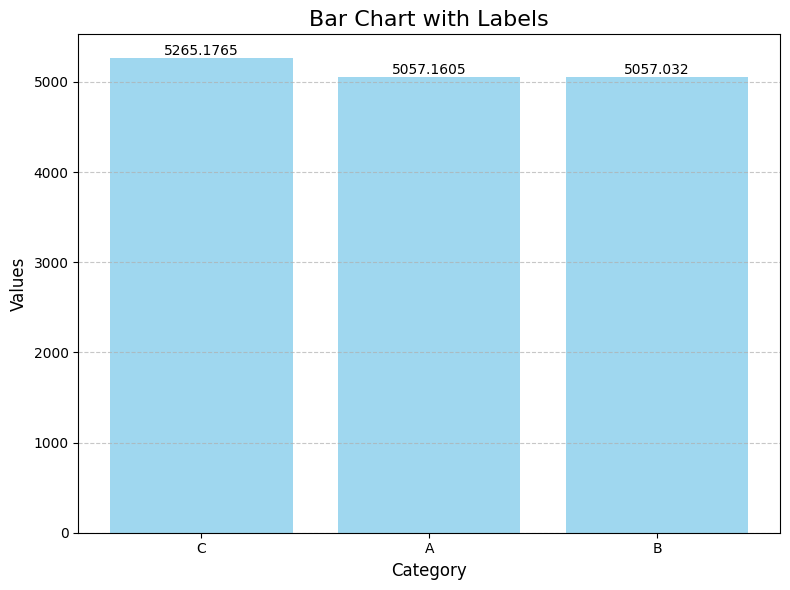

In [18]:
# Create the bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
bars = plt.bar(gross_income_df['Branch'], gross_income_df['gross income'], color='skyblue', alpha=0.8)

# Add labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        height,  # Y position (top of the bar)
        f'{height}',  # Label text
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10,  # Font size
        color='black'  # Font color
    )

# Customize the chart
plt.title('Bar Chart with Labels', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional gridlines
plt.tight_layout()

# Show the chart
plt.show()

**Gross Income by Branch**

- According to the table, the **branch that generates the highest gross income** is **Branch C**, with **5,265 USD**.  
- The other two branches, **Branch A** and **Branch B**, have **slightly similar gross incomes**, indicating balanced performance between them.  

## **What is the busiest month in terms of transactions?**

In [19]:
supermarket_df['month_name'] = supermarket_df['Date'].dt.strftime('%B')
# get month name from Date column

In [20]:
supermarket_df.groupby(by='month_name').agg({
    'Invoice ID' : 'count'
}).sort_values(by='Invoice ID',ascending=False)

,Invoice ID
month_name,
January,352
March,345
February,303



**Busiest Month**  

- According to the data, **January** is the busiest month with **352 transactions**, closely followed by **March** with **345 transactions**.  
- **February** records the lowest number of transactions, with only **303 transactions**.

## **Which product has the highest rating in each branch?**

In [21]:
supermarket_df.groupby(by=['Branch', 'Product line']).agg({
    'Rating' : ['mean', 'max', 'min']
})

Rating           
                                   mean   max  min
Branch Product line                               
A      Electronic accessories  6.911667   9.9  4.3
       Fashion accessories     6.878431   9.9  4.0
       Food and beverages      7.253448   9.9  4.0
       Health and beauty       6.900000  10.0  4.2
       Home and lifestyle      6.930769   9.9  4.1
       Sports and travel       7.257627   9.9  4.1
B      Electronic accessories  7.116364  10.0  4.0
       Fashion accessories     6.722581   9.9  4.1
       Food and beverages      6.994000   9.9  4.0
       Health and beauty       7.100000   9.9  4.0
       Home and lifestyle      6.516000   9.8  4.1
       Sports and travel       6.509677  10.0  4.1
C      Electronic accessories  6.747273   9.8  4.1
       Fashion accessories     7.440000   9.9  4.0
       Food and beverages      7.080303   9.9  4.0
       Health and beauty       6.998077   9.9  4.1
       Home and lifestyle      7.060000   9.8  4.3
       Sports and travel       7.028889  10.0  4.0

**Product Line Ratings per Branch**

- At **Branch A**, the **Health and Beauty** product has the highest rating of **10 out of 10**, while the lowest rating is **4**, which applies to the **Food and Beverage** product.
  
- At **Branch B**, both **Electronic Accessories** and **Sports and Travel** products have the highest rating of **10 out of 10**, while the lowest rating, **4**, is given to **Electronic Accessories**, **Food and Beverage**, and **Health and Beauty** products.

- At **Branch C**, the **Sports and Travel** product holds the highest rating of **10 out of 10**, and the lowest rating is **4**, which is assigned to **Fashion Accessories**, **Food and Beverage**, and **Sports and Travel** products.

## **What is the busiest time of day for each branch?**  

In [22]:
supermarket_df['Hours'] = supermarket_df['Time'].str.slice(0, 2)

supermarket_branch_a = supermarket_df[supermarket_df['Branch'] == 'A']
supermarket_branch_b = supermarket_df[supermarket_df['Branch'] == 'B']
supermarket_branch_c = supermarket_df[supermarket_df['Branch'] == 'C']

supermarket_branch_a = supermarket_branch_a.groupby(by='Hours').agg({
    'Invoice ID' : 'count'
}).reset_index()

supermarket_branch_b = supermarket_branch_b.groupby(by='Hours').agg({
    'Invoice ID' : 'count'
}).reset_index()

supermarket_branch_c = supermarket_branch_c.groupby(by='Hours').agg({
    'Invoice ID' : 'count'
}).reset_index()

In [23]:
print('Branch A:')
supermarket_branch_a.sort_values(by='Invoice ID', ascending=False).head(1)

Branch A:


,Hours,Invoice ID
0,10,38


In [24]:
print('Branch B:')
supermarket_branch_b.sort_values(by='Invoice ID', ascending=False).head(1)

Branch B:


,Hours,Invoice ID
9,19,50


In [25]:
print('Branch C:')
supermarket_branch_c.sort_values(by='Invoice ID', ascending=False).head(1)

Branch C:


,Hours,Invoice ID
0,10,37


**Busy Times in the Supermarket**

- Based on the data, the **busiest time** for **Branch A** and **Branch C** is at **10 AM**, while for **Branch B**, the peak time occurs at **7 PM**.

## **During which month does each customer type (Member/Normal) purchase the most products?**  

In [26]:
supermarket_df.groupby(by=['month_name','Customer type']).agg({
    'Total' : 'sum'
})

Total
month_name Customer type           
February   Member         50296.050
           Normal         46923.324
January    Member         57914.829
           Normal         58377.039
March      Member         56012.565
           Normal         53442.942


**Total Purchases (USD) per Month by Customer Type**

- Based on the data, **members** recorded the **highest total purchases** in **January**, amounting to **57,914 USD**.  
- Similarly, **normal customers** also reached their **highest total purchases** in **January**, with a total of **58,377 USD**.

## **Which city incurs the highest cost of goods sold (COGS)?**

In [27]:
supermarket_df.groupby(by=['City','Product line']).agg({
    'cogs' : 'max'
})

cogs
City      Product line                  
Mandalay  Electronic accessories  897.57
          Fashion accessories     832.50
          Food and beverages      846.30
          Health and beauty       878.70
          Home and lifestyle      973.80
          Sports and travel       899.64
Naypyitaw Electronic accessories  823.40
          Fashion accessories     993.00
          Food and beverages      985.20
          Health and beauty       905.00
          Home and lifestyle      975.00
          Sports and travel       954.40
Yangon    Electronic accessories  886.70
          Fashion accessories     989.80
          Food and beverages      887.94
          Health and beauty       716.80
          Home and lifestyle      906.50
          Sports and travel       882.81

**COGS per Product Line by City**

- The **highest COGS** for **Electronic Accessories** is in **Mandalay City**, amounting to **USD 897**.  
- The **highest COGS** for **Fashion Accessories** is in **Yangon City**, amounting to **USD 989**.  
- The **highest COGS** for **Food and Beverages** is in **Naypyitaw City**, amounting to **USD 985**.  
- The **highest COGS** for **Health and Beauty** is in **Naypyitaw City**, amounting to **USD 905**.  
- The **highest COGS** for **Home and Lifestyle** is in **Naypyitaw City**, amounting to **USD 975**.  
- The **highest COGS** for **Sports and Travel** is in **Naypyitaw City**, amounting to **USD 954**.  

Notably, **four out of six product lines** have the **highest COGS** in **Naypyitaw City**.

## **What is the average rating given by each gender?**

In [28]:
supermarket_df.groupby(by='Gender').agg({
    'Rating' : ['mean', 'max', 'min']
})

Rating           
            mean   max  min
Gender                     
Female  6.964471  10.0  4.0
Male    6.980962  10.0  4.0

**Gender Ratings Given**

- According to the table, both **female** and **male customers** give an **average rating of 6.9**.  
- The **lowest rating** given by both genders is **4 out of 10**.

## **Which month generates the highest profit?**

In [29]:
supermarket_df.groupby(by='month_name').agg({
    'gross income' : 'sum'
}).sort_values(by='gross income', ascending = False)

,gross income
month_name,
January,5537.708
March,5212.167
February,4629.494


**Monthly Gross Income**  

- The **highest gross income** was recorded in **January**, totaling **$5,537 USD**.

## **What is the average rating given by each customer type?**

In [30]:
supermarket_df.groupby(by='Customer type').agg({
    'Rating' : ['min','max','mean']
})

Rating                
                 min   max      mean
Customer type                       
Member           4.0  10.0  6.940319
Normal           4.0  10.0  7.005210

**Customer Ratings Analysis**  

- **Membership Customers:**  
  - **Lowest Rating:** 4  
  - **Average Rating:** 6.9  

- **Normal Customers:**  
  - **Lowest Rating:** 4  
  - **Average Rating:** 7  

## **How much does each customer purchase on average?**

In [31]:
supermarket_df.groupby(by='Customer type').agg({
    'Total' : ['min', 'max', 'mean']
})

Total                     
                   min      max        mean
Customer type                              
Member         10.6785  1042.65  327.791305
Normal         12.6945  1039.29  318.122856


According to the table, the total purchases for each customer type are relatively similar. The minimum purchase for members is 10 USD, while for regular customers, it is 12 USD. The maximum purchase amounts are 1,042 USD for members and 1,039 USD for regular customers. On average, members spend 327 USD per purchase, while regular customers spend 318 USD per purchase.

## **What payment methods do non-normal customers use?**  

In [32]:
supermarket_df.groupby(by=['Customer type', 'Payment']).agg({
    'Invoice ID' : 'count'
})

Invoice ID
Customer type Payment                
Member        Cash                168
              Credit card         172
              Ewallet             161
Normal        Cash                176
              Credit card         139
              Ewallet             184

According to the table, there is no significant difference in the usage of cash, credit card, and e-wallet by members during transactions. In contrast, for regular customers, the most frequently used payment method is e-wallet, with 184 transactions, while the least used method is credit card, with 139 transactions.

## **Comparison: Male and female customers by type (Normal/Member).**  

In [33]:
supermarket_df.groupby(by=['Gender', 'Customer type']).agg({
    'Invoice ID' : 'count'
})

Invoice ID
Gender Customer type            
Female Member                261
       Normal                240
Male   Member                240
       Normal                259

According to the data, the number of female members and regular customers is relatively close, with 261 female members and 240 female regular customers. Similarly, among males, there are 240 members and 259 regular customers.

## **Which products are most liked by each customer type?**

In [34]:
normal_customer_df = supermarket_df[supermarket_df['Customer type'] == 'Normal']
membership_customer_df = supermarket_df[supermarket_df['Customer type'] == 'Member']

normal_customer_df.groupby('Product line').agg({
    'Quantity' : 'sum'
})

,Quantity
Product line,
Electronic accessories,542
Fashion accessories,463
Food and beverages,446
Health and beauty,426
Home and lifestyle,421
Sports and travel,427


In [35]:
membership_customer_df.groupby('Product line').agg({
    'Quantity' : 'sum'
})

,Quantity
Product line,
Electronic accessories,429
Fashion accessories,439
Food and beverages,506
Health and beauty,428
Home and lifestyle,490
Sports and travel,493


According to the data, the highest-selling product category among regular customers is Electronic Accessories, with 542 items sold. For members, the most purchased product category is Food and Beverages, with 506 items sold.

## **Which products are most liked by each gender?**  

In [36]:
membership_customer_df.groupby(['Gender','Product line']).agg({
    'Quantity' : 'sum'
})

Quantity
Gender Product line                    
Female Electronic accessories       208
       Fashion accessories          257
       Food and beverages           286
       Health and beauty            158
       Home and lifestyle           291
       Sports and travel            292
Male   Electronic accessories       221
       Fashion accessories          182
       Food and beverages           220
       Health and beauty            270
       Home and lifestyle           199
       Sports and travel            201

According to the data, the highest purchased product category among female customers is Sports and Travel, with 292 items sold. For male customers, the most purchased category is Health and Beauty, with 270 items sold.

## **How many ratings does each branch receive?**

In [37]:
supermarket_df.groupby(by='Branch').agg({
    'Rating' : ['min','max','mean']
})

Rating                
          min   max      mean
Branch                       
A         4.0  10.0  7.027059
B         4.0  10.0  6.818072
C         4.0  10.0  7.072866

According to the data, each branch shares the same minimum and maximum ratings, with a minimum rating of 4 and a maximum rating of 10. However, Branch B has the lowest average rating, at 6.81.

## **What is the peak sales month for each product line?**

In [38]:
supermarket_df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [39]:
health_beauty_df = supermarket_df[supermarket_df['Product line'] == 'Health and beauty']
health_beauty_df.groupby(by='month_name').agg({
    'Quantity' : 'sum'
})

,Quantity
month_name,
February,266
January,254
March,334


According to the data, the highest sales of Health and Beauty products occurred in March. With 334 quantities sold





In [40]:
electronics_product = supermarket_df[supermarket_df['Product line'] == 'Electronic accessories']
electronics_product.groupby(by='month_name').agg({
    'Quantity' : 'sum'
})

,Quantity
month_name,
February,313
January,333
March,325


According to the data, the highest sales of Electronic accessories products occurred in January. with 333 quantities sold

In [41]:
home_lifestyle_product = supermarket_df[supermarket_df['Product line'] == 'Home and lifestyle']
home_lifestyle_product.groupby(by='month_name').agg({
    'Quantity' : 'sum'
})

,Quantity
month_name,
February,205
January,342
March,364


According to the data, the highest sales of Home and lifestyle products occurred in March. with 364 quantities sold

In [42]:
sports_travel_product = supermarket_df[supermarket_df['Product line'] == 'Sports and travel']
sports_travel_product.groupby(by='month_name').agg({
    'Quantity' : 'sum'
})

,Quantity
month_name,
February,226
January,375
March,319


According to the data, the highest sales of Sports and travel products occurred in January. with 375 quantities sold



In [43]:
food_beverage_product = supermarket_df[supermarket_df['Product line'] == 'Food and beverages']
food_beverage_product.groupby(by='month_name').agg({
    'Quantity' : 'sum'
})

,Quantity
month_name,
February,349
January,325
March,278


According to the data, the highest sales of Food and beverages products occurred in February. with 349 quantities sold

In [44]:
fashion_accessories_product = supermarket_df[supermarket_df['Product line'] == 'Fashion accessories']
fashion_accessories_product.groupby(by='month_name').agg({
    'Quantity' : 'sum'
})

,Quantity
month_name,
February,295
January,336
March,271


According to the data, the highest sales of Fashion accessories products occurred in January. with 336 quantities sold

## **Which branch does each gender typically buy products from?**

In [45]:
supermarket_df.groupby(by=['Branch','Gender']).agg({
    'Invoice ID' : 'count'
})

Invoice ID
Branch Gender            
A      Female         161
       Male           179
B      Female         162
       Male           170
C      Female         178
       Male           150

Branch A sold more products to male customers than to female customers. Similarly, Branch B also sold more products to male customers than female customers. In contrast, Branch C sold more products to female customers than to male customers.

# **Insight and Recommendation**

### Updated Insights and Recommendations

---

#### **Insights**

##### 1. **Branch Performance**
- **Gross Income**: Branch C leads in gross income ($5,265), while Branch A and Branch B perform similarly.
- **Ratings**:
  - All branches share the same minimum (4) and maximum (10) ratings.
  - Branch B has the lowest average rating (6.81), indicating room for improvement in customer satisfaction.

##### 2. **Customer Segmentation**
- **Gender Distribution**:
  - Female members (261) slightly outnumber female regular customers (240).
  - Male regular customers (259) exceed male members (240).
- **Gender Preferences**:
  - Female customers prefer Sports and Travel (292 items sold).
  - Male customers favor Health and Beauty (270 items sold).
- **Branch-Specific Gender Trends**:
  - Branch A and Branch B sold more products to male customers.
  - Branch C sold more products to female customers.

##### 3. **Product Line Analysis**
- **Top-Selling Products**:
  - Members: Food and Beverages (506 items).
  - Regular Customers: Electronic Accessories (542 items).
- **Monthly Sales Highlights**:
  - **Health and Beauty**: March (334 items).
  - **Electronic Accessories**: January (333 items).
  - **Home and Lifestyle**: March (364 items).
  - **Sports and Travel**: January (375 items).
  - **Food and Beverages**: February (349 items).
  - **Fashion Accessories**: January (336 items).

##### 4. **Busiest Times and Seasonal Trends**
- **Peak Times**:
  - Branch A & C: 10 AM.
  - Branch B: 7 PM.
- **Busiest Months**:
  - January leads in overall transactions and sales across most categories.

##### 5. **Customer Ratings**
- **Membership Ratings**:
  - Members: Average rating (6.9).
  - Regular customers: Average rating (7).
- **Branch Ratings**:
  - Branch B has the lowest average customer rating (6.81), indicating possible dissatisfaction.

##### 6. **Payment Preferences**
- Members show no strong preference for payment methods.
- Regular customers prefer e-wallets (184 transactions), with credit cards being the least used (139 transactions).

---

#### **Recommendations**

##### 1. **Branch Performance**
- **Branch C as a Benchmark**:
  - Analyze Branch C’s operations and replicate its strategies across Branch A and Branch B to boost gross income.
- **Addressing Ratings**:
  - Investigate why Branch B has the lowest average rating (6.81) and implement targeted improvements, such as staff training or better customer engagement.

##### 2. **Product Line Strategies**
- **Targeted Promotions**:
  - Use insights from top-selling products to design promotional campaigns tailored to each customer group (e.g., discounts on Food and Beverages for members, deals on Electronic Accessories for regular customers).
- **Seasonal Campaigns**:
  - Leverage peak months for product categories (e.g., promote Health and Beauty in March, Electronic Accessories in January).

##### 3. **Customer Engagement**
- **Gender-Specific Campaigns**:
  - For female customers: Highlight Sports and Travel products.
  - For male customers: Focus on Health and Beauty promotions.
- **Branch-Specific Strategies**:
  - Tailor marketing efforts to reflect gender preferences at each branch (e.g., Branch C campaigns targeting female customers).

##### 4. **Improving Payment Systems**
- Encourage credit card use among regular customers with loyalty rewards or discounts to balance payment preferences.

##### 5. **Peak Times Optimization**
- **Resource Allocation**:
  - Branch A & C: Ensure sufficient staffing and inventory at 10 AM.
  - Branch B: Focus operational resources on 7 PM.

##### 6. **Member Engagement**
- Promote membership benefits to regular customers, emphasizing exclusive discounts or rewards programs to encourage sign-ups.